In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files


In [14]:
uploaded = files.upload()  # Upload your cleaned CSV file here


Saving customer_reviews.csv to customer_reviews.csv


In [15]:
df = pd.read_csv('customer_reviews.csv')
df.head()


,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [16]:
print("Shape of dataset:", df.shape)
print("\nClass distribution:\n", df['sentiment'].value_counts())
print("\nSample data:\n", df.sample(5))


Shape of dataset: (1000, 2)

Class distribution:
 sentiment
0    500
1    500
Name: count, dtype: int64

Sample data:
                                                 review  sentiment
832                                       dont buy it.          0
801               For the price this was a great deal.          1
386                                Poor sound quality.          0
871  I received my headset in good time and was hap...          1
877                                        Excellent!.          1


In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",good case excellent value
2,Great for the jawbone.,great for the jawbone
3,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...
4,The mic is great.,the mic is great


In [18]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])

y = df['sentiment']  # Target variable: 0 or 1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 800
Testing samples: 200


In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.79

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.87      0.79        93
           1       0.87      0.72      0.79       107

    accuracy                           0.79       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



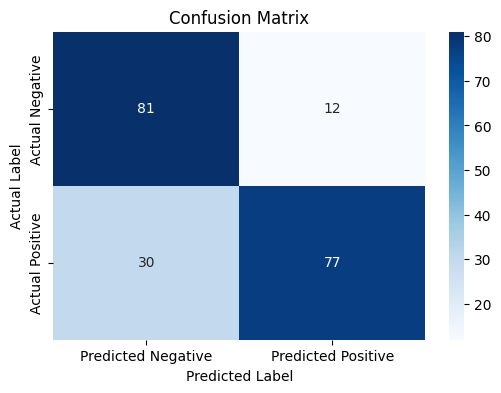

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [23]:
print(" Sentiment Analysis using TF-IDF + Logistic Regression.")


 Sentiment Analysis using TF-IDF + Logistic Regression.
